In [1]:
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


In [2]:
from bingo import *
from graph import *
from counting import *
from latex import *
from parallel import *

In [3]:
RUNS = 5_000_000
DECKS=[1,2,3,4,5,10,15,20,25,30,35,40]
palette = colorblind_palette(len(DECKS))

In [4]:
np.random.seed(56734)

In [5]:
DECKS=[1,2,3,4,5,10,15,20,25,30,35,40]
palette = colorblind_palette(len(DECKS))

In [6]:
%%time

df_jokers_3 = quick_deck_matches_on(RUNS, accept_jokers=True, early_stop=3, decks=DECKS)
df_jokers_3.head()

CPU times: user 265 ms, sys: 690 ms, total: 955 ms
Wall time: 4min 52s


,Deck count,Results,Successes,N,Probability
0,1,0 -1 1 -1 2 -1 3 ...,797144,5000000,15.94288
1,2,0 -1 1 -1 2 -1 3 ...,1467414,5000000,29.34828
2,3,0 -1 1 -1 2 2 3 ...,2028793,5000000,40.57586
3,4,0 -1 1 2 2 -1 3 ...,2502762,5000000,50.05524
4,5,0 0 1 2 2 0 3 ...,2901202,5000000,58.02404


In [7]:
with_red = palette[0].copy()
with_red[8] = (palette[1])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


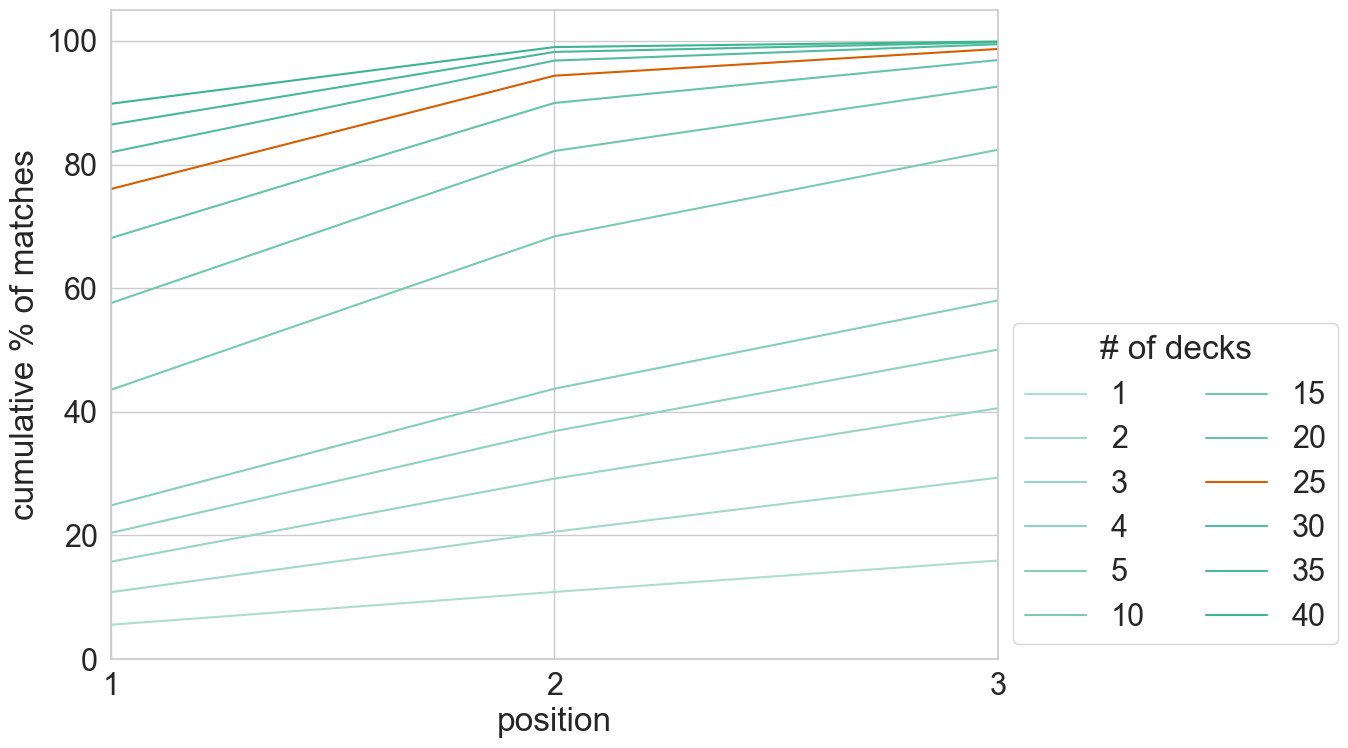

In [8]:
ax, data_3 = print_cumulative(df_jokers_3, True, xticks=[1, 2, 3], palette=with_red, figsize=(14, 8))

ax.get_lines()[8].set_color(palette[1])

plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=2, title="# of decks")
plt.xlim(1, 3)
plt.ylim(0, 105)
ax.set_xlabel("position")
ax.set_ylabel("cumulative % of matches")
plt.tight_layout()

plt.savefig(f"images/fig-the-naturally-ocurring-bingo-miracle3.eps", bbox_inches='tight', dpi=300)
plt.show()

In [9]:
for i, (decks, card, values) in data_3.query("card==3").iterrows():
  print(decks, values, confidence(values * RUNS / 100, RUNS))

1.0 15.942879999999999 (0.1591081823772302, 0.15974994095769648)
2.0 29.348280000000003 (0.2930838201598903, 0.29388209718245595)
3.0 40.57586 (0.40532825856734567, 0.4061890862476479)
4.0 50.055240000000005 (0.5001141306878278, 0.5009906684633332)
5.0 58.02404 (0.5798077496132286, 0.5806729270862578)
10.0 82.397 (0.8236359251576731, 0.8243035770174485)
15.0 92.60990000000001 (0.9258693614499022, 0.9263279837898339)
20.0 96.89613999999999 (0.9688090281954764, 0.9691130511802313)
25.0 98.69558 (0.9868559697334417, 0.9870548819913729)
30.0 99.4553 (0.9944881034823736, 0.9946171365682883)
35.0 99.77002 (0.9976578287575689, 0.9977418064569833)
40.0 99.90269999999998 (0.9989992853895752, 0.9990539477861642)


In [10]:
prob_table_to_latex(partial_card_to_prob(data_3.query("card==1"), RUNS), name="the-naturally-ocurring-bingo-miracle1")

\begin{table}[tb]
\label{tbl:the-naturally-ocurring-bingo-miracle1}
\begin{tabular}{llll}
\toprule
 & Probability & CI lower & CI upper \\
Decks &  &  &  \\
\midrule
1 & 5.559% & 5.539% & 5.579% \\
2 & 10.825% & 10.798% & 10.853% \\
3 & 15.765% & 15.733% & 15.797% \\
4 & 20.415% & 20.380% & 20.451% \\
5 & 24.861% & 24.823% & 24.899% \\
10 & 43.562% & 43.519% & 43.605% \\
15 & 57.586% & 57.542% & 57.629% \\
20 & 68.106% & 68.065% & 68.146% \\
25 & 76.042% & 76.004% & 76.079% \\
30 & 81.978% & 81.944% & 82.012% \\
35 & 86.463% & 86.433% & 86.493% \\
40 & 89.836% & 89.810% & 89.863% \\
\bottomrule
\end{tabular}
\end{table}



In [11]:
prob_table_to_latex(partial_card_to_prob(data_3.query("card==3"), RUNS), name="the-naturally-ocurring-bingo-miracle3")

\begin{table}[tb]
\label{tbl:the-naturally-ocurring-bingo-miracle3}
\begin{tabular}{llll}
\toprule
 & Probability & CI lower & CI upper \\
Decks &  &  &  \\
\midrule
1 & 15.943% & 15.911% & 15.975% \\
2 & 29.348% & 29.308% & 29.388% \\
3 & 40.576% & 40.533% & 40.619% \\
4 & 50.055% & 50.011% & 50.099% \\
5 & 58.024% & 57.981% & 58.067% \\
10 & 82.397% & 82.364% & 82.430% \\
15 & 92.610% & 92.587% & 92.633% \\
20 & 96.896% & 96.881% & 96.911% \\
25 & 98.696% & 98.686% & 98.705% \\
30 & 99.455% & 99.449% & 99.462% \\
35 & 99.770% & 99.766% & 99.774% \\
40 & 99.903% & 99.900% & 99.905% \\
\bottomrule
\end{tabular}
\end{table}

